In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

pd.options.display.max_rows = 30
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.6f}'.format

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tools.eval_measures import rmse

from scipy import stats
from scipy.stats import shapiro

from datetime import datetime

In [2]:
df = pd.read_csv('train.csv')
df.head()

,ID,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,6719,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545000
1,2557,Built-up Area,Ready To Move,Anekal,1 RK,NaN,351,1.000000,1.000000,16.000000
2,3285,Plot Area,18-05-2024,Whitefield,4 Bedroom,Prtates,500Sq. Yards,4.000000,2.000000,378.000000
3,1484,Carpet Area,18-03-2024,Hebbal,2 BHK,Arcia S,547.34 - 827.31,2.000000,0.000000,42.720000
4,3620,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,Sorisa,1750,3.000000,3.000000,149.000000


In [3]:
df.drop('ID', axis=1, inplace=True)

In [4]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545000
1,Built-up Area,Ready To Move,Anekal,1 RK,NaN,351,1.000000,1.000000,16.000000
2,Plot Area,18-05-2024,Whitefield,4 Bedroom,Prtates,500Sq. Yards,4.000000,2.000000,378.000000
3,Carpet Area,18-03-2024,Hebbal,2 BHK,Arcia S,547.34 - 827.31,2.000000,0.000000,42.720000
4,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,Sorisa,1750,3.000000,3.000000,149.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10656 entries, 0 to 10655
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     10656 non-null  object 
 1   availability  10656 non-null  object 
 2   location      10655 non-null  object 
 3   size          10642 non-null  object 
 4   society       6228 non-null   object 
 5   total_sqft    10656 non-null  object 
 6   bath          10591 non-null  float64
 7   balcony       10152 non-null  float64
 8   price         10656 non-null  float64
dtypes: float64(3), object(6)
memory usage: 749.4+ KB


In [6]:
df_ar = pd.read_csv('avg_rent.csv')
df_ar.head()

,location,avg_2bhk_rent
0,Krishnarajapura,11954
1,Sarjapur,45000
2,Whitefield Hope Farm Junction,26370
3,Devanahalli,17302
4,Whitefield,14981


In [7]:
df_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   location       157 non-null    object
 1   avg_2bhk_rent  157 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.6+ KB


In [8]:
df_dc = pd.read_csv('dist_from_city_centre.csv')
df_dc.head()

,location,dist_from_city
0,Whitefield,17.300000
1,Sarjapur Road,17.200000
2,Electronic City,18.100000
3,Kanakpura Road,26.500000
4,Thanisandra,11.500000


In [9]:
df_dc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        500 non-null    object 
 1   dist_from_city  500 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.9+ KB


In [10]:
df = pd.merge(left=df, right=df_ar, how='left', on='location')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,avg_2bhk_rent
0,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545000,16000.000000
1,Built-up Area,Ready To Move,Anekal,1 RK,NaN,351,1.000000,1.000000,16.000000,NaN
2,Plot Area,18-05-2024,Whitefield,4 Bedroom,Prtates,500Sq. Yards,4.000000,2.000000,378.000000,14981.000000
3,Carpet Area,18-03-2024,Hebbal,2 BHK,Arcia S,547.34 - 827.31,2.000000,0.000000,42.720000,17340.000000
4,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,Sorisa,1750,3.000000,3.000000,149.000000,NaN


In [11]:
df = pd.merge(left=df, right=df_dc, how='left', on='location')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,avg_2bhk_rent,dist_from_city
0,Plot Area,Immediate Possession,Hoskote,NaN,SJowsn,800 - 2660,NaN,NaN,28.545000,16000.000000,24.700000
1,Built-up Area,Ready To Move,Anekal,1 RK,NaN,351,1.000000,1.000000,16.000000,NaN,34.200000
2,Plot Area,18-05-2024,Whitefield,4 Bedroom,Prtates,500Sq. Yards,4.000000,2.000000,378.000000,14981.000000,17.300000
3,Carpet Area,18-03-2024,Hebbal,2 BHK,Arcia S,547.34 - 827.31,2.000000,0.000000,42.720000,17340.000000,11.100000
4,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,Sorisa,1750,3.000000,3.000000,149.000000,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10656 entries, 0 to 10655
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area_type       10656 non-null  object 
 1   availability    10656 non-null  object 
 2   location        10655 non-null  object 
 3   size            10642 non-null  object 
 4   society         6228 non-null   object 
 5   total_sqft      10656 non-null  object 
 6   bath            10591 non-null  float64
 7   balcony         10152 non-null  float64
 8   price           10656 non-null  float64
 9   avg_2bhk_rent   3677 non-null   float64
 10  dist_from_city  9636 non-null   float64
dtypes: float64(5), object(6)
memory usage: 999.0+ KB


In [13]:
df.isnull().sum()

area_type            0
availability         0
location             1
size                14
society           4428
total_sqft           0
bath                65
balcony            504
price                0
avg_2bhk_rent     6979
dist_from_city    1020
dtype: int64

In [14]:
def cal_missing_val():
    missing_count = df.isnull().sum()
    missing_pct = (missing_count / df.isnull().count())*100
    df_missing_pct = pd.concat([missing_count, missing_pct], axis=1, keys=['missing_count', 'missing_pct'])
    print(df_missing_pct.sort_values(ascending=False, by='missing_pct'))
    
cal_missing_val()

                missing_count  missing_pct
avg_2bhk_rent            6979    65.493619
society                  4428    41.554054
dist_from_city           1020     9.572072
balcony                   504     4.729730
bath                       65     0.609985
size                       14     0.131381
location                    1     0.009384
area_type                   0     0.000000
availability                0     0.000000
total_sqft                  0     0.000000
price                       0     0.000000


In [15]:
# avg_2bhk_rent and society columns we can drop
df.drop(['avg_2bhk_rent', 'society'], axis=1, inplace=True)

In [16]:
# for location, bath, and size small number of values missing so that row we can drop
df.dropna(subset=["location", 'bath','size'], inplace=True)

In [17]:
cal_missing_val()

                missing_count  missing_pct
dist_from_city           1017     9.603399
balcony                   439     4.145420
area_type                   0     0.000000
availability                0     0.000000
location                    0     0.000000
size                        0     0.000000
total_sqft                  0     0.000000
bath                        0     0.000000
price                       0     0.000000


In [18]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,dist_from_city
1,Built-up Area,Ready To Move,Anekal,1 RK,351,1.000000,1.000000,16.000000,34.200000
2,Plot Area,18-05-2024,Whitefield,4 Bedroom,500Sq. Yards,4.000000,2.000000,378.000000,17.300000
3,Carpet Area,18-03-2024,Hebbal,2 BHK,547.34 - 827.31,2.000000,0.000000,42.720000,11.100000
4,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.000000,3.000000,149.000000,NaN
5,Plot Area,18-03-2024,Marathi Layout,1 Bedroom,5.31Acres,1.000000,0.000000,110.000000,NaN


In [19]:
df['area_type'].value_counts()

Super built-up  Area    6964
Built-up  Area          1920
Plot  Area              1637
Carpet  Area              69
Name: area_type, dtype: int64

In [20]:
df['availability'].value_counts()

Ready To Move    8452
18-05-2024        229
18-12-2024        228
18-04-2024        202
18-08-2024        162
                 ... 
16-11-2024          1
17-02-2024          1
15-12-2024          1
20-04-2024          1
15-08-2024          1
Name: availability, Length: 78, dtype: int64

In [21]:
def convert_availability_to_category(val):
    if val == 'Ready To Move':
        return val
    elif val == 'Immediate Possession':
        return val
    else:
        diff_days = (datetime.strptime(val, '%d-%m-%Y') - datetime.now()).days
        if diff_days <= 90:
            return 'Available in 3 months'
        elif diff_days <= 180:
            return 'Available in 6 months'
        elif diff_days <= 365:
            return 'Available in 1 year'
        else:
            return 'Available after 1 year'


if 'availability_period' not in df.columns: 
    df['availability_period'] = df['availability'].apply(convert_availability_to_category)
    
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,dist_from_city,availability_period
1,Built-up Area,Ready To Move,Anekal,1 RK,351,1.000000,1.000000,16.000000,34.200000,Ready To Move
2,Plot Area,18-05-2024,Whitefield,4 Bedroom,500Sq. Yards,4.000000,2.000000,378.000000,17.300000,Available in 6 months
3,Carpet Area,18-03-2024,Hebbal,2 BHK,547.34 - 827.31,2.000000,0.000000,42.720000,11.100000,Available in 3 months
4,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.000000,3.000000,149.000000,NaN,Ready To Move
5,Plot Area,18-03-2024,Marathi Layout,1 Bedroom,5.31Acres,1.000000,0.000000,110.000000,NaN,Available in 3 months


In [22]:
df['availability_period'].value_counts()

Ready To Move            8452
Available in 1 year      1013
Available in 3 months     571
Available in 6 months     554
Name: availability_period, dtype: int64

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

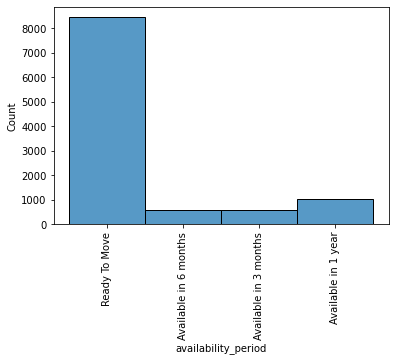

In [23]:
sns.histplot(df['availability_period'])
plt.xticks(rotation='vertical')

In [24]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,dist_from_city,availability_period
1,Built-up Area,Ready To Move,Anekal,1 RK,351,1.000000,1.000000,16.000000,34.200000,Ready To Move
2,Plot Area,18-05-2024,Whitefield,4 Bedroom,500Sq. Yards,4.000000,2.000000,378.000000,17.300000,Available in 6 months
3,Carpet Area,18-03-2024,Hebbal,2 BHK,547.34 - 827.31,2.000000,0.000000,42.720000,11.100000,Available in 3 months
4,Built-up Area,Ready To Move,Devarabeesana Halli,3 BHK,1750,3.000000,3.000000,149.000000,NaN,Ready To Move
5,Plot Area,18-03-2024,Marathi Layout,1 Bedroom,5.31Acres,1.000000,0.000000,110.000000,NaN,Available in 3 months


In [25]:
df['size'] = df['size'].apply(lambda x: x.split()[0])
df['size'] = df['size'].astype('int32')

In [26]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,dist_from_city,availability_period
1,Built-up Area,Ready To Move,Anekal,1,351,1.000000,1.000000,16.000000,34.200000,Ready To Move
2,Plot Area,18-05-2024,Whitefield,4,500Sq. Yards,4.000000,2.000000,378.000000,17.300000,Available in 6 months
3,Carpet Area,18-03-2024,Hebbal,2,547.34 - 827.31,2.000000,0.000000,42.720000,11.100000,Available in 3 months
4,Built-up Area,Ready To Move,Devarabeesana Halli,3,1750,3.000000,3.000000,149.000000,NaN,Ready To Move
5,Plot Area,18-03-2024,Marathi Layout,1,5.31Acres,1.000000,0.000000,110.000000,NaN,Available in 3 months


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10590 entries, 1 to 10655
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area_type            10590 non-null  object 
 1   availability         10590 non-null  object 
 2   location             10590 non-null  object 
 3   size                 10590 non-null  int32  
 4   total_sqft           10590 non-null  object 
 5   bath                 10590 non-null  float64
 6   balcony              10151 non-null  float64
 7   price                10590 non-null  float64
 8   dist_from_city       9573 non-null   float64
 9   availability_period  10590 non-null  object 
dtypes: float64(4), int32(1), object(5)
memory usage: 868.7+ KB


In [28]:
def sq_yards_to_sq_feet(sq_yards):
    return sq_yards * 9

def sq_meters_to_sq_feet(sq_meters):
    return sq_meters * 10.764

def acres_to_sq_feet(acres):
    return acres * 43560

def perch_to_sq_feet(perches):
    return perches * 272.25

def cents_to_sq_feet(cents):
    return cents * 435.6

def guntha_to_sq_feet(guntha):
    return guntha * 1089

def grounds_to_sq_feet(grounds):
    return grounds * 2400

def extract_numeric(input_string):
    numeric_part = ''.join(char for char in input_string if char.isdigit())
    return float(numeric_part)

def handle_total_sqft(val):
    if '-' in val:
        n = val.split(' - ')
        n1 = float(n[0])
        n2 = float(n[1])
        return round( (n1+n2)/2  ,2 )
    elif 'yards' in str.lower(val):
        val = extract_numeric(val)
        return round(sq_yards_to_sq_feet(val),2)
    elif 'meter' in str.lower(val):
        val = extract_numeric(val)
        return round(sq_meters_to_sq_feet(val),2)
    elif 'acres' in str.lower(val):
        val = extract_numeric(val)
        return round(acres_to_sq_feet(val),2)
    elif 'perch' in str.lower(val):
        val = extract_numeric(val)
        return round(perch_to_sq_feet(val),2)
    elif 'cents' in str.lower(val):
        val = extract_numeric(val)
        return round(cents_to_sq_feet(val),2)
    elif 'guntha' in str.lower(val):
        val = extract_numeric(val)
        return round(guntha_to_sq_feet(val),2)
    elif 'grounds' in str.lower(val):
        val = extract_numeric(val)
        return round(grounds_to_sq_feet(val),2)
    else:
        return float(val)

df['total_sqft'] = df['total_sqft'].apply(handle_total_sqft)
df['total_sqft'] = df['total_sqft'].astype('float64')

In [29]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,dist_from_city,availability_period
1,Built-up Area,Ready To Move,Anekal,1,351.000000,1.000000,1.000000,16.000000,34.200000,Ready To Move
2,Plot Area,18-05-2024,Whitefield,4,4500.000000,4.000000,2.000000,378.000000,17.300000,Available in 6 months
3,Carpet Area,18-03-2024,Hebbal,2,687.330000,2.000000,0.000000,42.720000,11.100000,Available in 3 months
4,Built-up Area,Ready To Move,Devarabeesana Halli,3,1750.000000,3.000000,3.000000,149.000000,NaN,Ready To Move
5,Plot Area,18-03-2024,Marathi Layout,1,23130360.000000,1.000000,0.000000,110.000000,NaN,Available in 3 months


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10590 entries, 1 to 10655
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area_type            10590 non-null  object 
 1   availability         10590 non-null  object 
 2   location             10590 non-null  object 
 3   size                 10590 non-null  int32  
 4   total_sqft           10590 non-null  float64
 5   bath                 10590 non-null  float64
 6   balcony              10151 non-null  float64
 7   price                10590 non-null  float64
 8   dist_from_city       9573 non-null   float64
 9   availability_period  10590 non-null  object 
dtypes: float64(5), int32(1), object(4)
memory usage: 868.7+ KB


In [31]:
df['bath'] = df['bath'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10590 entries, 1 to 10655
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area_type            10590 non-null  object 
 1   availability         10590 non-null  object 
 2   location             10590 non-null  object 
 3   size                 10590 non-null  int32  
 4   total_sqft           10590 non-null  float64
 5   bath                 10590 non-null  int32  
 6   balcony              10151 non-null  float64
 7   price                10590 non-null  float64
 8   dist_from_city       9573 non-null   float64
 9   availability_period  10590 non-null  object 
dtypes: float64(4), int32(2), object(4)
memory usage: 827.3+ KB


In [32]:
df['balcony'].value_counts()

2.000000    4068
1.000000    3894
3.000000    1342
0.000000     847
Name: balcony, dtype: int64

In [33]:
balcony_mode = df['balcony'].mode()[0]
df['balcony'].fillna(balcony_mode, inplace=True)
df['balcony'] = df['balcony'].astype('int32')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10590 entries, 1 to 10655
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area_type            10590 non-null  object 
 1   availability         10590 non-null  object 
 2   location             10590 non-null  object 
 3   size                 10590 non-null  int32  
 4   total_sqft           10590 non-null  float64
 5   bath                 10590 non-null  int32  
 6   balcony              10590 non-null  int32  
 7   price                10590 non-null  float64
 8   dist_from_city       9573 non-null   float64
 9   availability_period  10590 non-null  object 
dtypes: float64(3), int32(3), object(4)
memory usage: 786.0+ KB


In [35]:
df['dist_from_city'].value_counts()

17.300000    448
17.200000    372
12.900000    318
18.100000    248
11.500000    232
            ... 
12.600000      3
2.200000       3
29.800000      3
15.600000      2
26.700000      2
Name: dist_from_city, Length: 193, dtype: int64

In [36]:
df['dist_from_city'].describe()

count   9573.000000
mean      15.168672
std        6.223837
min        1.900000
25%       11.100000
50%       14.400000
75%       17.400000
max       47.700000
Name: dist_from_city, dtype: float64

<AxesSubplot:xlabel='dist_from_city'>

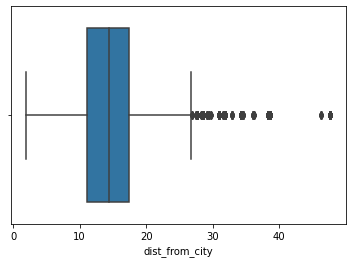

In [37]:
sns.boxplot(df['dist_from_city'])

In [38]:
d_mean = df['dist_from_city'].mean()
d_mean

15.168672307531306

In [39]:
d_med = df['dist_from_city'].median()
d_med

14.4

In [40]:
df_dist_mean = df['dist_from_city'].fillna(d_mean)
df_dist_mean.describe()

count   10590.000000
mean       15.168672
std         5.917416
min         1.900000
25%        11.500000
50%        15.100000
75%        17.300000
max        47.700000
Name: dist_from_city, dtype: float64

In [41]:
df_dist_median = df['dist_from_city'].fillna(d_med)
df_dist_median.describe()

count   10590.000000
mean       15.094854
std         5.921749
min         1.900000
25%        11.500000
50%        14.400000
75%        17.300000
max        47.700000
Name: dist_from_city, dtype: float64

In [42]:
df['dist_from_city'].fillna(d_med, inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10590 entries, 1 to 10655
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area_type            10590 non-null  object 
 1   availability         10590 non-null  object 
 2   location             10590 non-null  object 
 3   size                 10590 non-null  int32  
 4   total_sqft           10590 non-null  float64
 5   bath                 10590 non-null  int32  
 6   balcony              10590 non-null  int32  
 7   price                10590 non-null  float64
 8   dist_from_city       10590 non-null  float64
 9   availability_period  10590 non-null  object 
dtypes: float64(3), int32(3), object(4)
memory usage: 786.0+ KB


<AxesSubplot:>

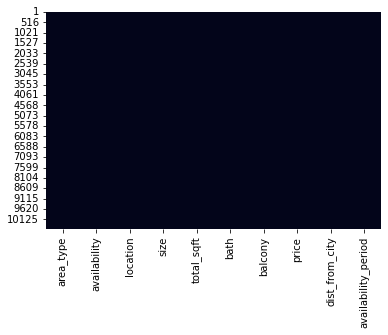

In [44]:
sns.heatmap(df.isnull(), cbar=False)

In [45]:
df.isnull().sum()

area_type              0
availability           0
location               0
size                   0
total_sqft             0
bath                   0
balcony                0
price                  0
dist_from_city         0
availability_period    0
dtype: int64

In [46]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,dist_from_city,availability_period
1,Built-up Area,Ready To Move,Anekal,1,351.000000,1,1,16.000000,34.200000,Ready To Move
2,Plot Area,18-05-2024,Whitefield,4,4500.000000,4,2,378.000000,17.300000,Available in 6 months
3,Carpet Area,18-03-2024,Hebbal,2,687.330000,2,0,42.720000,11.100000,Available in 3 months
4,Built-up Area,Ready To Move,Devarabeesana Halli,3,1750.000000,3,3,149.000000,14.400000,Ready To Move
5,Plot Area,18-03-2024,Marathi Layout,1,23130360.000000,1,0,110.000000,14.400000,Available in 3 months


In [47]:
outliers_cols =  ['size', 'total_sqft', 'bath','balcony','dist_from_city']

def cal_outliers(df, cols):
    outliers_count = []
    for col in cols:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lb = q1 - 1.5*iqr
        ub = q3 + 1.5*iqr
        outliers = (df[col] < lb) | (df[col] > ub)
        outliers_count.append(outliers.sum())
    outliers_count = pd.Series(outliers_count, index=cols)
    return outliers_count

outliers_count = cal_outliers(df,outliers_cols)
outliers_count

size              669
total_sqft        955
bath              823
balcony             0
dist_from_city    683
dtype: int64

In [48]:
cols_to_clear = ['size', 'total_sqft', 'bath', 'balcony','dist_from_city']

def remove_outliers(df, cols_to_clear):
    df_outliers = df.copy()
    for col in cols_to_clear:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lb = q1 - 1.5*iqr
        ub = q3 + 1.5*iqr
        outliers_mask = (df[col] < lb) | (df[col]>ub)
        df_outliers = df_outliers[~outliers_mask]
    return df_outliers
df_outliers = remove_outliers(df, cols_to_clear)
df_outliers.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,dist_from_city,availability_period
3,Carpet Area,18-03-2024,Hebbal,2,687.330000,2,0,42.720000,11.100000,Available in 3 months
4,Built-up Area,Ready To Move,Devarabeesana Halli,3,1750.000000,3,3,149.000000,14.400000,Ready To Move
7,Super built-up Area,Ready To Move,Yelahanka New Town,1,284.000000,1,1,8.000000,21.500000,Ready To Move
8,Super built-up Area,19-12-2024,Bhoganhalli,1,296.000000,1,0,22.890000,14.400000,Available in 1 year
9,Carpet Area,19-06-2024,Hormavu,1,583.000000,1,0,28.275000,11.900000,Available in 6 months


In [49]:
df_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8436 entries, 3 to 10655
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   area_type            8436 non-null   object 
 1   availability         8436 non-null   object 
 2   location             8436 non-null   object 
 3   size                 8436 non-null   int32  
 4   total_sqft           8436 non-null   float64
 5   bath                 8436 non-null   int32  
 6   balcony              8436 non-null   int32  
 7   price                8436 non-null   float64
 8   dist_from_city       8436 non-null   float64
 9   availability_period  8436 non-null   object 
dtypes: float64(3), int32(3), object(4)
memory usage: 626.1+ KB


In [50]:
cap_outliers_cols = ['total_sqft','dist_from_city']

for col in cap_outliers_cols:
    q1 = df_outliers[col].quantile(0.25)
    q3 = df_outliers[col].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - 1.5*iqr
    ub = q3 + 1.5*iqr
    lc = df_outliers[col].quantile(0.10)
    uc = df_outliers[col].quantile(0.90)
    df_outliers[col] = np.where(df_outliers[col] < lb, lc, df_outliers[col])
    df_outliers[col] = np.where(df_outliers[col] > ub, uc, df_outliers[col])

In [51]:
cal_outliers(df_outliers, cols_to_clear)

size              0
total_sqft        0
bath              0
balcony           0
dist_from_city    0
dtype: int64

In [52]:
df_num = df_outliers.select_dtypes(include=np.number)


In [53]:
df_num.describe()

,size,total_sqft,bath,balcony,price,dist_from_city
count,8436.000000,8436.000000,8436.000000,8436.000000,8436.000000,8436.000000
mean,2.457089,1298.601908,2.320650,1.562707,81.361772,14.242793
std,0.684269,348.069123,0.683244,0.782123,60.009735,3.963823
min,1.000000,432.000000,1.000000,0.000000,8.000000,3.100000
25%,2.000000,1089.000000,2.000000,1.000000,48.000000,11.500000
50%,2.000000,1240.000000,2.000000,2.000000,65.000000,14.400000
75%,3.000000,1530.000000,3.000000,2.000000,95.000000,17.200000
max,4.000000,2185.000000,4.000000,3.000000,1063.000000,24.700000


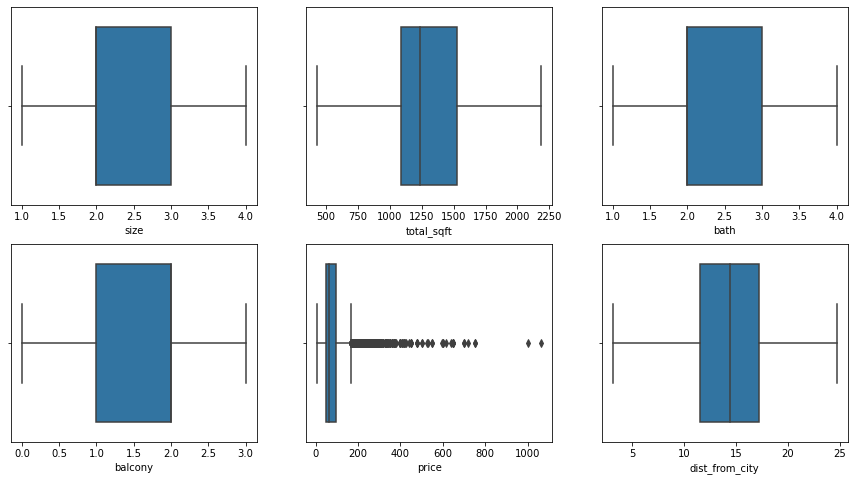

In [54]:
fig, ax = plt.subplots(2,3,figsize=(15,8))

for col, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(df_num[col], orient='h', whis=1.5, ax=subplot)
    z.set_xlabel(col)

In [55]:
df_clear = df_outliers.copy()

In [56]:
le = LabelEncoder()
df_clear['location_enc'] = le.fit_transform(df_clear['location'])
df_clear.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,dist_from_city,availability_period,location_enc
3,Carpet Area,18-03-2024,Hebbal,2,687.330000,2,0,42.720000,11.100000,Available in 3 months,386
4,Built-up Area,Ready To Move,Devarabeesana Halli,3,1750.000000,3,3,149.000000,14.400000,Ready To Move,270
7,Super built-up Area,Ready To Move,Yelahanka New Town,1,900.000000,1,1,8.000000,21.500000,Ready To Move,979
8,Super built-up Area,19-12-2024,Bhoganhalli,1,900.000000,1,0,22.890000,14.400000,Available in 1 year,2
9,Carpet Area,19-06-2024,Hormavu,1,583.000000,1,0,28.275000,11.900000,Available in 6 months,407


In [57]:
df_clear.drop(['location'],axis=1,inplace=True)

In [58]:
df_clear = pd.get_dummies(df_clear, columns=['area_type'])
df_clear.head()

,availability,size,total_sqft,bath,balcony,price,dist_from_city,availability_period,location_enc,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
3,18-03-2024,2,687.330000,2,0,42.720000,11.100000,Available in 3 months,386,0,1,0,0
4,Ready To Move,3,1750.000000,3,3,149.000000,14.400000,Ready To Move,270,1,0,0,0
7,Ready To Move,1,900.000000,1,1,8.000000,21.500000,Ready To Move,979,0,0,0,1
8,19-12-2024,1,900.000000,1,0,22.890000,14.400000,Available in 1 year,2,0,0,0,1
9,19-06-2024,1,583.000000,1,0,28.275000,11.900000,Available in 6 months,407,0,1,0,0


In [59]:
df_clear.drop(['availability'],axis=1,inplace=True)

In [60]:
df_clear.head()

,size,total_sqft,bath,balcony,price,dist_from_city,availability_period,location_enc,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
3,2,687.330000,2,0,42.720000,11.100000,Available in 3 months,386,0,1,0,0
4,3,1750.000000,3,3,149.000000,14.400000,Ready To Move,270,1,0,0,0
7,1,900.000000,1,1,8.000000,21.500000,Ready To Move,979,0,0,0,1
8,1,900.000000,1,0,22.890000,14.400000,Available in 1 year,2,0,0,0,1
9,1,583.000000,1,0,28.275000,11.900000,Available in 6 months,407,0,1,0,0


In [61]:
ava_categories = ['Available in 1 year', 'Available in 6 months', 'Available in 3 months', 'Ready To Move']
oe = OrdinalEncoder(categories=[ava_categories])
df_clear['availability_enc'] = oe.fit_transform(df_clear[['availability_period']])
df_clear.head()

,size,total_sqft,bath,balcony,price,dist_from_city,availability_period,location_enc,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_enc
3,2,687.330000,2,0,42.720000,11.100000,Available in 3 months,386,0,1,0,0,2.000000
4,3,1750.000000,3,3,149.000000,14.400000,Ready To Move,270,1,0,0,0,3.000000
7,1,900.000000,1,1,8.000000,21.500000,Ready To Move,979,0,0,0,1,3.000000
8,1,900.000000,1,0,22.890000,14.400000,Available in 1 year,2,0,0,0,1,0.000000
9,1,583.000000,1,0,28.275000,11.900000,Available in 6 months,407,0,1,0,0,1.000000


In [62]:
df_clear.drop('availability_period',axis=1,inplace=True)


In [63]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8436 entries, 3 to 10655
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   size                            8436 non-null   int32  
 1   total_sqft                      8436 non-null   float64
 2   bath                            8436 non-null   int32  
 3   balcony                         8436 non-null   int32  
 4   price                           8436 non-null   float64
 5   dist_from_city                  8436 non-null   float64
 6   location_enc                    8436 non-null   int32  
 7   area_type_Built-up  Area        8436 non-null   uint8  
 8   area_type_Carpet  Area          8436 non-null   uint8  
 9   area_type_Plot  Area            8436 non-null   uint8  
 10  area_type_Super built-up  Area  8436 non-null   uint8  
 11  availability_enc                8436 non-null   float64
dtypes: float64(4), int32(4), uint8(4)

In [64]:
df_clear.head()

,size,total_sqft,bath,balcony,price,dist_from_city,location_enc,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_enc
3,2,687.330000,2,0,42.720000,11.100000,386,0,1,0,0,2.000000
4,3,1750.000000,3,3,149.000000,14.400000,270,1,0,0,0,3.000000
7,1,900.000000,1,1,8.000000,21.500000,979,0,0,0,1,3.000000
8,1,900.000000,1,0,22.890000,14.400000,2,0,0,0,1,0.000000
9,1,583.000000,1,0,28.275000,11.900000,407,0,1,0,0,1.000000


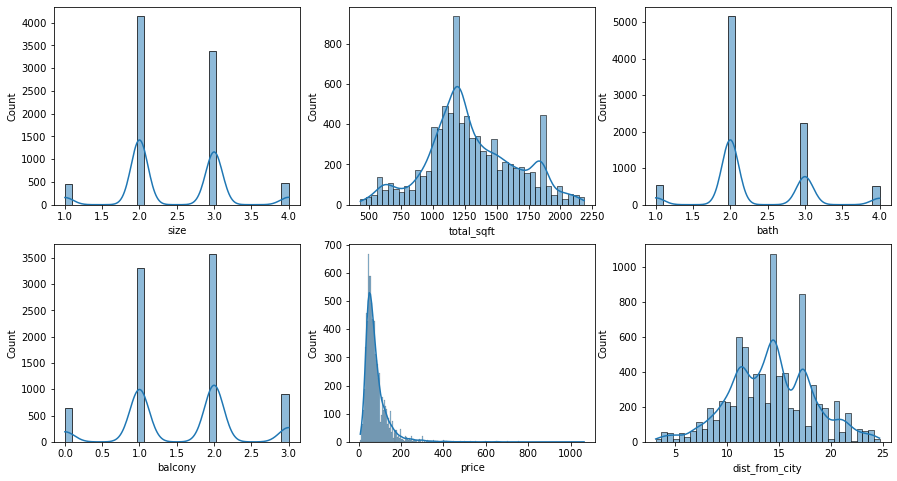

In [65]:
fig, ax = plt.subplots(2,3, figsize=(15,8))

for col, subplot in zip(df_clear.columns, ax.flatten()):
    z = sns.histplot(df_clear[col], kde=True, ax=subplot)
    z.set_xlabel(col)

In [66]:
df_ready = df_clear.copy()

In [67]:
y = df_ready['price']
y.head()

3    42.720000
4   149.000000
7     8.000000
8    22.890000
9    28.275000
Name: price, dtype: float64

In [68]:
df_ready.drop('price',axis=1,inplace=True)

In [69]:
ss = StandardScaler()

scale_cols = ['size','total_sqft','bath','balcony','dist_from_city']

df_ready_scaled = df_ready.copy()

for col in scale_cols:
    df_ready_scaled[col] = ss.fit_transform(df_ready[[col]])
    
df_ready_scaled.head()

,size,total_sqft,bath,balcony,dist_from_city,location_enc,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_enc
3,-0.668036,-1.756284,-0.469333,-1.998151,-0.792916,386,0,1,0,0,2.000000
4,0.793465,1.296940,0.994361,1.837790,0.039663,270,1,0,0,0,3.000000
7,-2.129536,-1.145248,-1.933026,-0.719504,1.830969,979,0,0,0,1,3.000000
8,-2.129536,-1.145248,-1.933026,-1.998151,0.039663,2,0,0,0,1,0.000000
9,-2.129536,-2.056041,-1.933026,-1.998151,-0.591079,407,0,1,0,0,1.000000


In [70]:
X = df_ready_scaled
X = sm.add_constant(X)

In [71]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X, y, test_size=0.2, random_state=100)
print(X_train_full.shape)
print(X_test_full.shape)
print(y_train_full.shape)
print(y_test_full.shape)

(6748, 12)
(1688, 12)
(6748,)
(1688,)


In [72]:
price_full_model = sm.OLS(y_train_full, X_train_full).fit()
price_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     558.5
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:58:58   Log-Likelihood:                -35016.
No. Observations:                6748   AIC:                         7.005e+04
Df Residuals:                    6737   BIC:                         7.013e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             71.4563      1.934     36.940      0.000      67.664      75.248
size                              -1.4778      0.927     -1.594      0.111      -3.295       0.339
total_sqft                        27.9100      0.775     35.996      0.000      26.390      29.430
bath                               9.9457      0.920     10.807      0.000       8.142      11.750
balcony                           -2.2487      0.588     -3.826      0.000      -3.401      -1.096
dist_from_city                    -9.7433      0.544    -17.923      0.000     -10.809      -8.678
location_enc                      -0.0022      0.002     -1.208      0.227      -0.006       0.001
area_type_Built-up  Area           4.1625      1.740      2.392      0.017       0.752       7.573
area_type_Carpet  Area             6.6733      5.202      1.283      0.200      -3.524      16.871
area_type_Plot  Area              59.2782      2.074     28.576      0.000      55.212      63.345
area_type_Super built-up  Area     1.3422      1.523      0.881      0.378      -1.643       4.328
availability_enc                   1.2520      0.558      2.242      0.025       0.157       2.347
==============================================================================
Omnibus:                     7348.501   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1188253.425
Skew:                           5.262   Prob(JB):                         0.00
Kurtosis:                      67.151   Cond. No.                     1.05e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.15e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

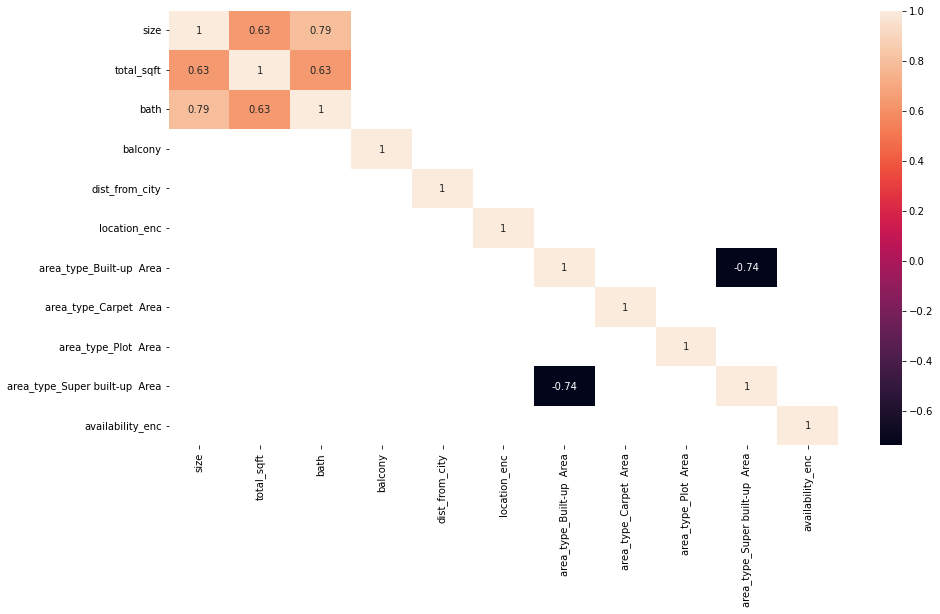

In [73]:
def show_corr(df):
    plt.figure(figsize=(15,8))
    sns.heatmap(df.corr()[abs(df.corr())>0.6], annot=True)

show_corr(df_ready_scaled)

In [74]:
df_ready_vif = df_ready_scaled.copy()

In [75]:
vif = pd.DataFrame()

vif['factor'] = [ variance_inflation_factor(df_ready_vif.values, i) for i in range(df_ready_vif.shape[1])]
vif['feature'] = df_ready_vif.columns
vif.sort_values(by='factor', ascending=False)

,factor,feature
9,8.078303,area_type_Super built-up Area
0,3.082937,size
6,3.034597,area_type_Built-up Area
2,3.028739,bath
8,2.527099,area_type_Plot Area
1,2.164670,total_sqft
3,1.241572,balcony
10,1.057543,availability_enc
7,1.053924,area_type_Carpet Area
4,1.043690,dist_from_city


In [76]:
for i in range(len(df_ready_vif.columns)):
    vif = pd.DataFrame()

    vif['factor'] = [ variance_inflation_factor(df_ready_vif.values, i) for i in range(df_ready_vif.shape[1])]
    vif['feature'] = df_ready_vif.columns
    multi = vif[vif['factor'] > 5]
    
    if multi.empty == False:
        df_multi_sorted = multi.sort_values(by='factor',ascending=False)
    else:
        print(vif)
        break
        
    if(df_multi_sorted.empty == False):
        df_ready_vif = df_ready_vif.drop(df_multi_sorted.feature.iloc[0],axis=1)
    else:
        print(vif)
        
df_ready_vif

    factor                   feature
0 3.081230                      size
1 2.163770                total_sqft
2 3.028672                      bath
3 1.236082                   balcony
4 1.039509            dist_from_city
5 3.075411              location_enc
6 1.282049  area_type_Built-up  Area
7 1.011032    area_type_Carpet  Area
8 1.519173      area_type_Plot  Area
9 3.455101          availability_enc


,size,total_sqft,bath,balcony,dist_from_city,location_enc,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,availability_enc
3,-0.668036,-1.756284,-0.469333,-1.998151,-0.792916,386,0,1,0,2.000000
4,0.793465,1.296940,0.994361,1.837790,0.039663,270,1,0,0,3.000000
7,-2.129536,-1.145248,-1.933026,-0.719504,1.830969,979,0,0,0,3.000000
8,-2.129536,-1.145248,-1.933026,-1.998151,0.039663,2,0,0,0,0.000000
9,-2.129536,-2.056041,-1.933026,-1.998151,-0.591079,407,0,1,0,1.000000
...,...,...,...,...,...,...,...,...,...,...
10649,-0.668036,-0.857932,-0.469333,-1.998151,1.881429,595,0,0,0,0.000000
10650,-0.668036,-0.602220,-0.469333,-1.998151,1.275917,312,0,0,0,0.000000
10651,-0.668036,-0.324960,-0.469333,-1.998151,-0.691998,891,0,0,0,0.000000
10653,-0.668036,-0.623769,-0.469333,-1.998151,-0.591079,407,0,0,0,3.000000


In [77]:
df_ready_vif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8436 entries, 3 to 10655
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   size                      8436 non-null   float64
 1   total_sqft                8436 non-null   float64
 2   bath                      8436 non-null   float64
 3   balcony                   8436 non-null   float64
 4   dist_from_city            8436 non-null   float64
 5   location_enc              8436 non-null   int32  
 6   area_type_Built-up  Area  8436 non-null   uint8  
 7   area_type_Carpet  Area    8436 non-null   uint8  
 8   area_type_Plot  Area      8436 non-null   uint8  
 9   availability_enc          8436 non-null   float64
dtypes: float64(6), int32(1), uint8(3)
memory usage: 519.0 KB


In [78]:
X = df_ready_vif
X = sm.add_constant(X)
X_train_signi, X_test_signi, y_train_signi, y_test_signi = train_test_split(X, y, test_size=0.2, random_state=100)
print(X_train_signi.shape)
print(X_test_signi.shape)
print(y_train_signi.shape)
print(y_test_signi.shape)
price_signi_model = sm.OLS(y_train_signi, X_train_signi).fit()
price_signi_model.summary()

(6748, 11)
(1688, 11)
(6748,)
(1688,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     558.5
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:59:00   Log-Likelihood:                -35016.
No. Observations:                6748   AIC:                         7.005e+04
Df Residuals:                    6737   BIC:                         7.013e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       72.7985      1.774     41.035      0.000      69.321      76.276
size                        -1.4778      0.927     -1.594      0.111      -3.295       0.339
total_sqft                  27.9100      0.775     35.996      0.000      26.390      29.430
bath                         9.9457      0.920     10.807      0.000       8.142      11.750
balcony                     -2.2487      0.588     -3.826      0.000      -3.401      -1.096
dist_from_city              -9.7433      0.544    -17.923      0.000     -10.809      -8.678
location_enc                -0.0022      0.002     -1.208      0.227      -0.006       0.001
area_type_Built-up  Area     2.8202      1.418      1.989      0.047       0.041       5.600
area_type_Carpet  Area       5.3311      6.523      0.817      0.414      -7.457      18.119
area_type_Plot  Area        57.9360      2.083     27.813      0.000      53.853      62.019
availability_enc             1.2520      0.558      2.242      0.025       0.157       2.347
==============================================================================
Omnibus:                     7348.501   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1188253.425
Skew:                           5.262   Prob(JB):                         0.00
Kurtosis:                      67.151   Cond. No.                     7.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [79]:
price_signi_model_pvals = pd.DataFrame(price_signi_model.pvalues, columns=['P-value'])
price_signi_model_pvals.sort_values(by='P-value',ascending=False)

,P-value
area_type_Carpet Area,0.413836
location_enc,0.226935
size,0.110929
area_type_Built-up Area,0.046728
availability_enc,0.024976
balcony,0.000132
bath,0.000000
dist_from_city,0.000000
area_type_Plot Area,0.000000
total_sqft,0.000000


In [80]:
ins_vars = price_signi_model_pvals[1:][price_signi_model_pvals[1:]['P-value'] > 0.05]
ins_vars

,P-value
size,0.110929
location_enc,0.226935
area_type_Carpet Area,0.413836


In [81]:
df_ready_sign = df_ready_vif.drop(['size','location_enc','area_type_Carpet  Area'], axis=1)
df_ready_sign.head()

,total_sqft,bath,balcony,dist_from_city,area_type_Built-up Area,area_type_Plot Area,availability_enc
3,-1.756284,-0.469333,-1.998151,-0.792916,0,0,2.000000
4,1.296940,0.994361,1.837790,0.039663,1,0,3.000000
7,-1.145248,-1.933026,-0.719504,1.830969,0,0,3.000000
8,-1.145248,-1.933026,-1.998151,0.039663,0,0,0.000000
9,-2.056041,-1.933026,-1.998151,-0.591079,0,0,1.000000


In [83]:
X = df_ready_sign
X = sm.add_constant(X)
X_train_signi, X_test_signi, y_train_signi, y_test_signi = train_test_split(X, y, test_size=0.2, random_state=100)
print(X_train_signi.shape)
print(X_test_signi.shape)
print(y_train_signi.shape)
print(y_test_signi.shape)
price_signi_model = sm.OLS(y_train_signi, X_train_signi).fit()
price_signi_model.summary()

(6748, 8)
(1688, 8)
(6748,)
(1688,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.453
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     797.0
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:59:13   Log-Likelihood:                -35019.
No. Observations:                6748   AIC:                         7.005e+04
Df Residuals:                    6740   BIC:                         7.011e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       71.8695      1.506     47.727      0.000      68.918      74.821
total_sqft                  27.4459      0.732     37.514      0.000      26.012      28.880
bath                         9.1532      0.749     12.222      0.000       7.685      10.621
balcony                     -2.3059      0.587     -3.930      0.000      -3.456      -1.156
dist_from_city              -9.8326      0.541    -18.162      0.000     -10.894      -8.771
area_type_Built-up  Area     2.6634      1.414      1.884      0.060      -0.108       5.435
area_type_Plot  Area        57.0715      2.023     28.205      0.000      53.105      61.038
availability_enc             1.2233      0.558      2.192      0.028       0.129       2.318
==============================================================================
Omnibus:                     7334.694   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1172646.585
Skew:                           5.249   Prob(JB):                         0.00
Kurtosis:                      66.722   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
df_ready_sign.drop('area_type_Built-up  Area', axis=1, inplace=True)

In [85]:
df_ready_sign['balcony*bath'] = df_ready_sign['balcony']*df_ready_sign['bath']
df_ready_sign

,total_sqft,bath,balcony,dist_from_city,area_type_Plot Area,availability_enc,balcony*bath
3,-1.756284,-0.469333,-1.998151,-0.792916,0,2.000000,0.937798
4,1.296940,0.994361,1.837790,0.039663,0,3.000000,1.827426
7,-1.145248,-1.933026,-0.719504,1.830969,0,3.000000,1.390820
8,-1.145248,-1.933026,-1.998151,0.039663,0,0.000000,3.862479
9,-2.056041,-1.933026,-1.998151,-0.591079,0,1.000000,3.862479
...,...,...,...,...,...,...,...
10649,-0.857932,-0.469333,-1.998151,1.881429,0,0.000000,0.937798
10650,-0.602220,-0.469333,-1.998151,1.275917,0,0.000000,0.937798
10651,-0.324960,-0.469333,-1.998151,-0.691998,0,0.000000,0.937798
10653,-0.623769,-0.469333,-1.998151,-0.591079,0,3.000000,0.937798


In [86]:
X = df_ready_sign
X = sm.add_constant(X)
X_train_inter, X_test_inter, y_train_inter, y_test_inter = train_test_split(X, y, test_size=0.2, random_state=100)
print(X_train_inter.shape)
print(X_test_inter.shape)
print(y_train_inter.shape)
print(y_test_inter.shape)
price_inter_model = sm.OLS(y_train_inter, X_train_inter).fit()
price_inter_model.summary()

(6748, 8)
(1688, 8)
(6748,)
(1688,)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                     815.0
Date:                Fri, 19 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:59:23   Log-Likelihood:                -34984.
No. Observations:                6748   AIC:                         6.998e+04
Df Residuals:                    6740   BIC:                         7.004e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   70.6892      1.502     47.076      0.000      67.746      73.633
total_sqft              27.1876      0.727     37.400      0.000      25.763      28.613
bath                     9.8342      0.747     13.163      0.000       8.370      11.299
balcony                 -2.9111      0.584     -4.983      0.000      -4.056      -1.766
dist_from_city         -10.0197      0.539    -18.597      0.000     -11.076      -8.964
area_type_Plot  Area    55.2214      1.982     27.858      0.000      51.336      59.107
availability_enc         1.4972      0.552      2.710      0.007       0.414       2.580
balcony*bath             4.1913      0.493      8.503      0.000       3.225       5.158
==============================================================================
Omnibus:                     7390.600   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1225069.697
Skew:                           5.308   Prob(JB):                         0.00
Kurtosis:                      68.149   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

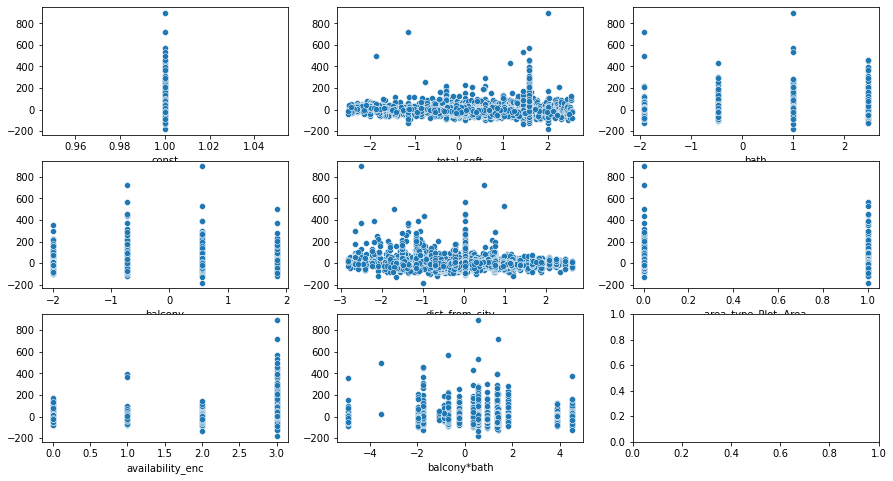

In [87]:
fig, ax = plt.subplots(3,3, figsize=(15,8))

for col, subplot in zip(X.columns, ax.flatten()):
    z = sns.scatterplot(X[col], price_inter_model.resid, ax=subplot)
    z.set_xlabel(col)

In [88]:
# create vector of result parmeters
name = ['f-value','p-value']

# perform Breusch-Pagan test using residuals and independent variables
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(price_inter_model.resid, price_inter_model.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
# use 'test[2:]' to retrieve the F-statistic and its corresponding p-value 
lzip(name, test[2:])

[('f-value', 28.129956493434666), ('p-value', 1.977696806526654e-38)]

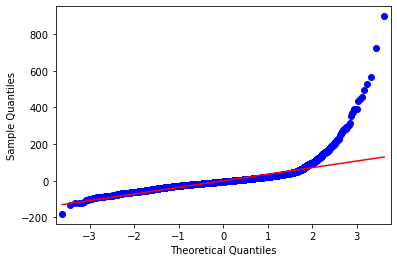

In [91]:
qqplot(price_inter_model.resid, line='r')
plt.show()

In [92]:
# perform Shapiro Wilk test using 'shapiro()' from scipy library
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# 'resid' returns the residuals in the model
# pass the residuals to 'shapiro()'
stat, p_value = shapiro(price_inter_model.resid)

# print the test statistic and corresponding p-value 
print('Test statistic:', stat)
print('P-Value:', p_value)

Test statistic: 0.6904961466789246
P-Value: 0.0


In [103]:

train_pred = price_inter_model.predict(X_train_inter)

test_pred = price_inter_model.predict(X_test_inter)

In [104]:

mse_train = round(mean_squared_error(y_train_inter, train_pred),4)


print("Mean Squared Error (MSE) on training set: ", mse_train)

mse_test = round(mean_squared_error(y_test_inter, test_pred),4)

print("Mean Squared Error (MSE) on test set: ", mse_test)

Mean Squared Error (MSE) on training set:  1864.8252
Mean Squared Error (MSE) on test set:  2594.9181


In [105]:

mse_train = mean_squared_error(y_train_inter, train_pred)

rmse_train = round(np.sqrt(mse_train), 4)

print("Root Mean Squared Error (RMSE) on training set: ", rmse_train)

mse_test = mean_squared_error(y_test_inter, test_pred)

rmse_test = round(np.sqrt(mse_test), 4)

print("Root Mean Squared Error (RMSE) on test set: ", rmse_test)

Root Mean Squared Error (RMSE) on training set:  43.1836
Root Mean Squared Error (RMSE) on test set:  50.9403


In [106]:

mae_train = round(mean_absolute_error(y_train_inter, train_pred),4)

print("Mean Absolute Error (MAE) on training set: ", mae_train)

mae_test = round(mean_absolute_error(y_test_inter, test_pred),4)

print("Mean Absolute Error (MAE) on test set: ", mae_test)

Mean Absolute Error (MAE) on training set:  24.5902
Mean Absolute Error (MAE) on test set:  26.8614


In [107]:
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

In [108]:


mape_train = round(mape(y_train_inter, train_pred),4)

print("Mean Absolute Percentage Error (MAPE) on training set: ", mape_train)


mape_test = round(mape(y_test_inter, test_pred),4)

print("Mean Absolute Percentage Error (MAPE) on test set: ", mape_test)

Mean Absolute Percentage Error (MAPE) on training set:  33.4029
Mean Absolute Percentage Error (MAPE) on test set:  36.0728


In [109]:
# create a list of column names
cols = ['Model_Name', 'R-squared', 'Adj. R-squared', 'MSE', 'RMSE', 'MAE', 'MAPE']

# creating a empty dataframe of the colums
result_table = pd.DataFrame(columns = cols)

In [110]:
y_pred_full = price_full_model.predict(X_test_full)

In [111]:
price_full_model_metrics = pd.Series({'Model_Name': "MLR Full Model",
                     'R-squared': price_full_model.rsquared,
                     'Adj. R-squared': price_full_model.rsquared_adj,
                     'MSE': mean_squared_error(y_test_full, y_pred_full),
                     'RMSE': rmse(y_test_full, y_pred_full),
                     'MAE': mean_absolute_error(y_test_full, y_pred_full),
                     'MAPE': mape(y_test_full, y_pred_full)
                   })

# append the values to the result table
result_table = result_table.append(price_full_model_metrics, ignore_index = True)

# print the result table
result_table

,Model_Name,R-squared,Adj. R-squared,MSE,RMSE,MAE,MAPE
0,MLR Full Model,0.453245,0.452434,2622.147668,51.206910,27.105316,36.620986


In [112]:
y_pred_signi = price_signi_model.predict(X_test_signi)

In [113]:
price_signi_model_metrics = pd.Series({'Model_Name': "MLR Full Model",
                     'R-squared': price_signi_model.rsquared,
                     'Adj. R-squared': price_signi_model.rsquared_adj,
                     'MSE': mean_squared_error(y_test_signi, y_pred_signi),
                     'RMSE': rmse(y_test_signi, y_pred_signi),
                     'MAE': mean_absolute_error(y_test_signi, y_pred_signi),
                     'MAPE': mape(y_test_signi, y_pred_signi)
                   })

# append the values to the result table
result_table = result_table.append(price_signi_model_metrics, ignore_index = True)

# print the result table
result_table

,Model_Name,R-squared,Adj. R-squared,MSE,RMSE,MAE,MAPE
0,MLR Full Model,0.453245,0.452434,2622.147668,51.206910,27.105316,36.620986
1,MLR Full Model,0.452881,0.452313,2623.453769,51.219662,27.199139,36.774559


In [114]:
y_pred_inter = price_inter_model.predict(X_test_inter)

In [115]:
price_inter_model_metrics = pd.Series({'Model_Name': "MLR Full Model",
                     'R-squared': price_inter_model.rsquared,
                     'Adj. R-squared': price_inter_model.rsquared_adj,
                     'MSE': mean_squared_error(y_test_inter, y_pred_inter),
                     'RMSE': rmse(y_test_inter, y_pred_inter),
                     'MAE': mean_absolute_error(y_test_inter, y_pred_inter),
                     'MAPE': mape(y_test_inter, y_pred_inter)
                   })

# append the values to the result table
result_table = result_table.append(price_inter_model_metrics, ignore_index = True)

# print the result table
result_table

,Model_Name,R-squared,Adj. R-squared,MSE,RMSE,MAE,MAPE
0,MLR Full Model,0.453245,0.452434,2622.147668,51.206910,27.105316,36.620986
1,MLR Full Model,0.452881,0.452313,2623.453769,51.219662,27.199139,36.774559
2,MLR Full Model,0.458402,0.457840,2594.918149,50.940339,26.861400,36.072766


In [118]:
# import functions to perform feature selection
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 10)

# initiate linear regression model to use in feature selection
linreg_rfe = LinearRegression()

# build the RFE model
# pass the regression model to 'estimator'
# pass number of required features to 'n_features_to_select'
# if we do not pass the number of features, RFE considers half of the features
rfe_model = RFE(estimator=linreg_rfe, n_features_to_select=8)

# fit the RFE model on the training dataset using fit()
rfe_model = rfe_model.fit(X_train, y_train)

# create a series containing feature and its corresponding rank obtained from RFE
# 'ranking_' returns the rank of each variable after applying RFE
# pass the ranks as the 'data' of a series
# 'index' assigns feature names as index of a series 
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train.columns)

# select the features with rank = 1
# 'index' returns the indices of a series (i.e. features with rank=1) 
signi_feat_rfe = feat_index[feat_index==1].index

# print the significant features obtained from RFE
print(signi_feat_rfe)

Index(['const', 'total_sqft', 'bath', 'balcony', 'dist_from_city',
       'area_type_Plot  Area', 'availability_enc', 'balcony*bath'],
      dtype='object')


In [144]:

# initiate linear regression
linreg = LinearRegression()

# build the model using new_X_train and y_train
linreg.fit(X_train, y_train)

# check the score
linreg.score(X_train, y_train)

0.4407641000396264

In [157]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(X_test_full)

    # MSE for the test data
    mse_test = mean_squared_error(y_test_full, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

In [160]:
# use Ridge() to perform ridge regression
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run 
ridge = Ridge(alpha = 1, max_iter = 500)

# fit the model on train set
ridge.fit(X_train_full, y_train_full)

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(ridge))

<IPython.core.display.Javascript object>

RMSE on test set: 51.2053


In [159]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(X_train_full, y_train_full)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha and l1-ratio
print('RMSE on test set:', get_test_rmse(enet_grid))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Best parameters for Elastic Net Regression:  {'alpha': 0.001, 'l1_ratio': 0.0001} 

RMSE on test set: 51.1965


In [142]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
                     
# 'max_iter':100,500,1000,1500,2000
 
# initiate the lasso regression model 
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train_inter, y_train_inter)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(lasso_grid))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Best parameters for Lasso Regression:  {'alpha': 0.1} 

RMSE on test set: 44.4922


In [153]:
real_test = pd.read_csv('processed_test4')

real_test = sm.add_constant(real_test)
real_test.head()

,const,total_sqft,bath,balcony,dist_from_city,area_type_Plot Area,availability_enc,balcony*bath
0,1.000000,-0.180291,-1.311147,-0.774311,-1.486428,0,3.000000,1.015236
1,1.000000,-0.059911,-0.539236,-0.774311,-0.744403,0,3.000000,0.417537
2,1.000000,-0.000557,0.232674,0.493522,0.342751,0,3.000000,0.114830
3,1.000000,-0.121773,-0.539236,-2.042145,0.221956,0,3.000000,1.101199
4,1.000000,-0.063255,-1.311147,-2.042145,-0.537326,1,3.000000,2.677552


In [148]:
y_real_pred = price_inter_model.predict(real_test)
y_real_pred.shape

(2664,)

In [149]:
y_real_pred_rnd = np.round(y_real_pred,2)
y_real_pred_rnd

0       78.790000
1       79.710000
2       73.060000
3       74.900000
4      138.340000
          ...    
2659    86.810000
2660   120.190000
2661    71.240000
2662   101.460000
2663    56.030000
Length: 2664, dtype: float64

In [150]:
y_real_pred_rnd.isnull().sum()

0

In [151]:
y_real_pred_rnd.to_csv('test_submit5.csv')

In [158]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]}]
                     
# 'max_iter':100,500,1000,1500,2000
 
# initiate the lasso regression model 
lasso = Lasso()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the lasso regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
lasso_grid = GridSearchCV(estimator = lasso, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
lasso_grid.fit(X_train_full, y_train_full)

# get the best parameters
print('Best parameters for Lasso Regression: ', lasso_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(lasso_grid))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Best parameters for Lasso Regression:  {'alpha': 0.1} 

RMSE on test set: 51.2029


In [154]:
y_real_pred_lasso = lasso_grid.predict(real_test)
y_real_pred_lasso.shape

(2664,)

In [155]:
y_real_pred_lasso_rnd = np.round(y_real_pred,2)
y_real_pred_lasso_rnd

0       78.790000
1       79.710000
2       73.060000
3       74.900000
4      138.340000
          ...    
2659    86.810000
2660   120.190000
2661    71.240000
2662   101.460000
2663    56.030000
Length: 2664, dtype: float64

In [156]:
y_real_pred_lasso_rnd.to_csv('test_submit6.csv')